In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tqdm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk

# Exploratory Analysis



In [ ]:
header = pd.read_csv('/content/drive/MyDrive/CA683/Copy of key.csv',sep='\t',header=None).transpose()[0].tolist()
test = pd.read_csv('/content/drive/MyDrive/CA683/Copy of test-balanced.csv',sep='\t',names = header)
train = pd.read_csv('/content/drive/MyDrive/CA683/Copy of train-balanced.csv',sep='\t',names = header)
data = pd.concat([train,test])
data.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
data.reset_index(drop=True)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1262429,1,Respect your elders you little snot.,Tiffany_Butler,sports,7,7,0,2009-06,1245445833,"Aren't you a little old to be on the internet,..."
1262430,1,I'm just glad they won't be using taxpayer mon...,harryballsagna,canada,8,8,0,2009-06,1246140814,"""I'm sorry, I can't hear you over the sound of..."
1262431,1,what.. with this awesome narration?,aberant,lost,4,4,0,2009-04,1240452084,"So far, so lame."
1262432,1,He looks trustworthy.,permaculture,unitedkingdom,1,1,0,2009-01,1231343418,"""I don't care"" says Lapland boss"


In [ ]:
train.shape

(1010773, 10)

In [ ]:
test.shape

(251594, 10)

Check class balance betweem sarcastic and neutural comments

In [ ]:
train['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [ ]:
test['label'].value_counts()

0    125799
1    125795
Name: label, dtype: int64

In [ ]:
data.isnull().sum()

label              0
comment           67
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
data.loc[data['comment'].isnull() == True]

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
56269,1,NaN,SodokuIRL,leagueoflegends,1,1,0,2016-09,1475050984,"LPL shitshow, EU LCS shitshow. What isn't a sh..."
68590,1,NaN,TossTheDog,westchesterpa,1,-1,-1,2016-10,1476217552,Car fires smell delicious to you? You should p...
135348,0,NaN,So12rovv,R6STeams,1,-1,-1,2016-12,1482427445,Will do. EU or NA?
199910,0,NaN,Khvostov_7g-02,tf2,1,1,0,2016-05,1463377603,"woah, thanks."
258718,1,NaN,PeaceLovePositivity,vaporents,5,5,0,2016-06,1466627831,"No, doing drugs while forming a fetus (your ki..."
...,...,...,...,...,...,...,...,...,...,...
192810,1,NaN,doppelwurzel,funny,1,1,0,2015-05,1432681571,Colorblind maybe? I dunno. I'm sure he won't d...
208819,1,NaN,OliverSparrow,Futurology,1,1,0,2014-05,1401350822,I think steam had a way bigger impact then the...
228124,1,NaN,Temp1ar,CanadaPolitics,7,7,0,2013-03,1363623223,"I hate ""not sure if sarcasm"" comments but your..."
236849,1,NaN,drewmat,survivor,2,2,0,2013-01,1357330075,"aw, that really sucks. i feel bad for him"


In [ ]:
train.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
test.isnull().sum()

label              0
comment           14
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

This indicates the distribution of data across subreddits

In [ ]:
data['subreddit'].value_counts()

AskReddit          81703
politics           49432
worldnews          32976
leagueoflegends    26487
pcmasterrace       23594
                   ...  
FatPeopleLogic         1
BadEverything          1
Lenovo                 1
rpcs3                  1
ditavonteese           1
Name: subreddit, Length: 16322, dtype: int64

In [ ]:
data.groupby('subreddit')['label'].agg([np.size,np.mean]).sort_values(by='size', ascending=False).head(10)

,size,mean
subreddit,,
AskReddit,81703,0.402409
politics,49432,0.604972
worldnews,32976,0.642710
leagueoflegends,26487,0.541964
pcmasterrace,23594,0.567814
funny,22510,0.452243
news,21037,0.602557
pics,20250,0.484148
todayilearned,17724,0.546829


Top 10 subreddits with the most sarcastic comments

In [ ]:
data[data['label']==1].groupby('subreddit')['label'].agg([np.size]).sort_values(by='size', ascending=False).head(10)


,size
subreddit,
AskReddit,32878
politics,29905
worldnews,21194
leagueoflegends,14355
pcmasterrace,13397
news,12676
funny,10180
pics,9804
todayilearned,9692


Top 10 subreddits with the most neutral comments

In [ ]:
data[data['label']==0].groupby('subreddit')['label'].agg([np.size]).sort_values(by='size', ascending=False).head(10)


,size
subreddit,
AskReddit,48825
politics,19527
funny,12330
leagueoflegends,12132
worldnews,11782
pics,10446
pcmasterrace,10197
nfl,8689
nba,8380


Top 10 authors with the most sarcastic comments

In [ ]:
data[data['label']==1].groupby('author')['label'].agg([np.size]).sort_values(by='size', ascending=False).head(10)


,size
author,
Biffingston,517
pokemon_fetish,267
NeonDisease,261
ShyBiDude89,250
ivsciguy,216
mindlessrabble,192
mad-n-fla,188
Canada_girl,186
sleaze_bag_alert,159


Top 10 authors with the most neutral comments

In [ ]:
data[data['label']==0].groupby('author')['label'].agg([np.size]).sort_values(by='size', ascending=False).head(10)


,size
author,
Biffingston,518
pokemon_fetish,267
NeonDisease,263
ShyBiDude89,250
ivsciguy,217
mindlessrabble,192
mad-n-fla,188
Canada_girl,186
sleaze_bag_alert,160


Distribution of comment length

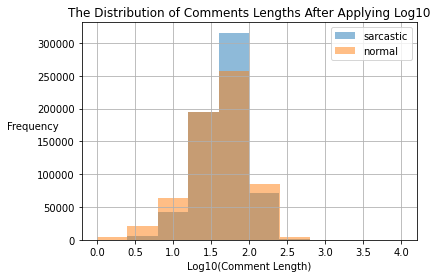

In [ ]:
data.loc[data['label'] == 1, 'comment'].str.len().apply(np.log10).hist(label='sarcastic', alpha=.5)
data.loc[data['label'] == 0, 'comment'].str.len().apply(np.log10).hist(label='normal', alpha=.5)
plt.title('The Distribution of Comments Lengths After Applying Log10')
plt.xlabel("Log10(Comment Length)")
plt.ylabel('Frequency',rotation=0)
plt.legend();

In [ ]:
data['comment'].str.len().describe().apply(np.round,decimals=2)

count    1262367.00
mean          56.66
std           60.39
min            1.00
25%           27.00
50%           46.00
75%           74.00
max        10000.00
Name: comment, dtype: float64

WordCloud for sarcastic comments

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords = STOPWORDS, width=1600, height=900,max_font_size=300)

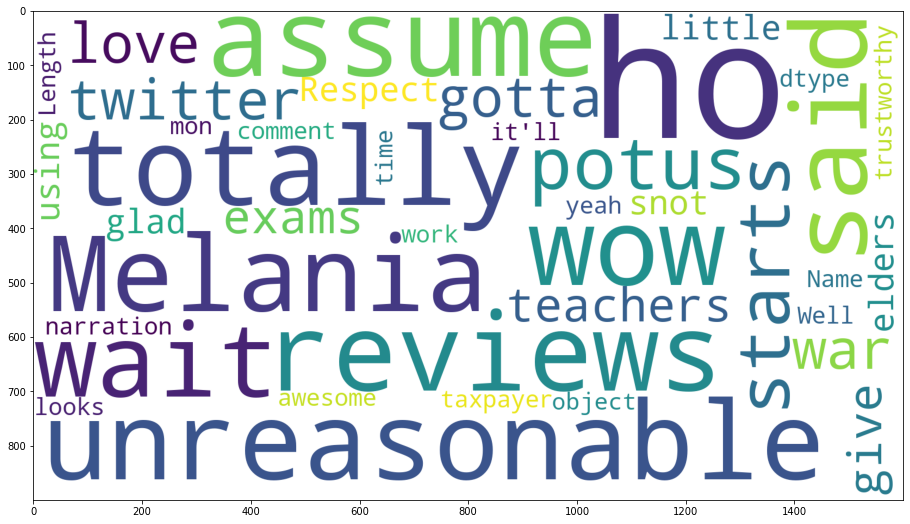

In [ ]:
plt.figure(figsize=(16, 9))
wordcloud.generate(str(data.loc[data['label'] == 1, 'comment']))
plt.imshow(wordcloud);

WordCloud for neutral comments

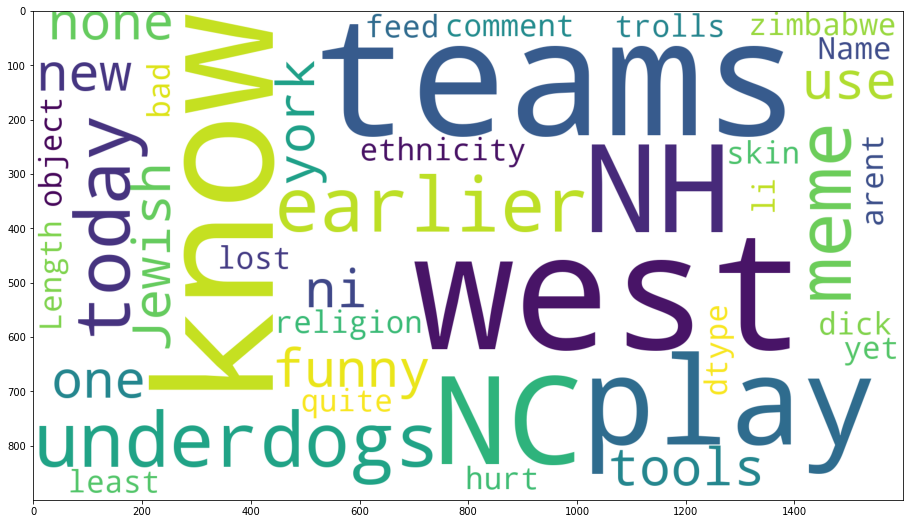

In [ ]:
plt.figure(figsize=(16, 9))
wordcloud.generate(str(data.loc[data['label'] == 0, 'comment']))
plt.imshow(wordcloud);

Get rid of rows with blank comments

In [ ]:
test = test.dropna()
train = train.dropna()

In [ ]:
test.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [ ]:
train.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

# Text Cleaning

In [ ]:
cleaned_train = train.copy(deep=True)
cleaned_test = test.copy(deep=True)

In [ ]:
!pip install contractions
import contractions
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
sws = set(stopwords.words("english"))
lemm = nltk.stem.WordNetLemmatizer()
stem = PorterStemmer()

In [ ]:
def clean_text(text):
  # Convert all to lower case
  text = str(text).lower()

  # Expand contractions
  text = contractions.fix(text)

  # Tokenisation
  text =  nltk.WordPunctTokenizer().tokenize(text)

  # Removing special characters and stopwords
  text = [ i for i in text if (i not in sws) and (i.isalpha())]

  # Lemmatisation
  text =  [lemm.lemmatize(w) for w in text]

  # Stemming
  text = [stem.stem(w) for w in text]
  
  return " ".join(text)


In [ ]:
cleaned_train['comment'] = cleaned_train['comment'].apply(lambda x: clean_text(x))
cleaned_test['comment'] = cleaned_test['comment'].apply(lambda x: clean_text(x))

In [ ]:
cleaned_train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,nc nh,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,know west team play west team east team right,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,underdog earlier today sinc gronk announc afte...,Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,meme funni none new york nigga one,icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,could use one tool,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
cleaned_test.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,actually supporter sane people saw medium espe...,Quinnjester,politics,3,3,0,2016-09,1473569605,Hillary's Surrogotes Told to Blame Media for '...
1,0,survive without echo chamber great america,TheGettysburgAddress,The_Donald,13,-1,-1,2016-11,1478788413,Thank God Liberals like to live in concentrate...
2,0,pretty cute total,Sempiternally_free,2007scape,8,-1,-1,2016-11,1478042903,Saw this cutie training his Attack today...
3,0,kill crash meme market,Catacomb82,AskReddit,2,-1,-1,2016-10,1477412597,If you were locked in a room with 49 other peo...
4,0,bet wrote last message sobbing,Dorian-throwaway,niceguys,5,-1,-1,2016-11,1477962278,You're not even that pretty!


In [ ]:
train['comment']

0                                                 NC and NH.
1          You do know west teams play against west teams...
2          They were underdogs earlier today, but since G...
3          This meme isn't funny none of the "new york ni...
4                            I could use one of those tools.
                                 ...                        
1010821    I'm sure that Iran and N. Korea have the techn...
1010822                   whatever you do, don't vote green!
1010823    Perhaps this is an atheist conspiracy to make ...
1010824    The Slavs got their own country - it is called...
1010825    values, as in capitalism .. there is good mone...
Name: comment, Length: 1010773, dtype: object

# Tfidf-Logistic Model Trained With Single Cleaned Comments

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1, 3), max_features=50000, min_df=1,lowercase=True)
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)


In [ ]:
single_cleaned_comment = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])
single_cleaned_comment.fit(cleaned_train['comment'], cleaned_train['label'])


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   17.6s finished


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=50000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [ ]:
single_cleaned_comment.score(cleaned_train['comment'],cleaned_train['label'])

0.7138597542999487

In [ ]:
valid_pred = single_cleaned_comment.predict(cleaned_test['comment'])

In [ ]:
accuracy_score(cleaned_test['label'], valid_pred)

0.6876092970016852

In [ ]:
print(classification_report(cleaned_test['label'], valid_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70    125804
           1       0.71      0.64      0.67    125804

    accuracy                           0.69    251608
   macro avg       0.69      0.69      0.69    251608
weighted avg       0.69      0.69      0.69    251608



# Tfidf-Logistic Model Trained With Combined Comments

In [ ]:
combined_comment_train = pd.DataFrame(train['parent_comment'] + train['comment'], columns=['comment'])
combined_comment_test = pd.DataFrame(test['parent_comment'] + test['comment'], columns=['comment'])

In [ ]:
combined_comment_train.head()

,comment
0,"Yeah, I get that argument. At this point, I'd ..."
1,The blazers and Mavericks (The wests 5 and 6 s...
2,They're favored to win.They were underdogs ear...
3,deadass don't kill my buzzThis meme isn't funn...
4,Yep can confirm I saw the tool they use for th...


In [ ]:
# Cleaning
combined_comment_train['comment'] = combined_comment_train['comment'].apply(lambda x: clean_text(x))
combined_comment_test['comment'] = combined_comment_test['comment'].apply(lambda x: clean_text(x))

In [ ]:
combined_comment_train.tail()

,comment
1010821,one call engin pathogen report viru bit human ...
1010822,move typic recent noth approach emiss canada a...
1010823,screw disabl I got get church timeperhap athei...
1010824,I alway unsettl hear lot jewish peopl say isra...
1010825,peopl make law seem unabl grasp countri basic ...


In [ ]:
combined_cleaned_comment = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])
combined_cleaned_comment.fit(combined_comment_train['comment'], train['label'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   23.0s finished


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=50000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [ ]:
valid_pred = combined_cleaned_comment.predict(combined_comment_test['comment'])
accuracy_score(cleaned_test['label'], valid_pred)

0.6530158023592255

In [ ]:
print(classification_report(cleaned_test['label'], combined_cleaned_comment.predict(combined_comment_test['comment'])))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66    125804
           1       0.66      0.62      0.64    125804

    accuracy                           0.65    251608
   macro avg       0.65      0.65      0.65    251608
weighted avg       0.65      0.65      0.65    251608



# Count-Logistic Model Trained With Combined Comments


In [ ]:
count = CountVectorizer(ngram_range = (1,3),min_df = 1, max_features = 500000,lowercase=True)

In [ ]:
count_logit = Pipeline([('count', count), 
                                 ('logit', logit)])

In [ ]:
count_logit.fit(combined_comment_train['comment'], cleaned_train['label'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   41.2s finished


Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=500000, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=4, penalty='l2',
            

In [ ]:
accuracy_score(cleaned_test['label'], count_logit.predict(combined_comment_test['comment']))

0.6394391275317161

In [ ]:
print(classification_report(cleaned_test['label'], count_logit.predict(combined_comment_test['comment'])))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65    125804
           1       0.65      0.60      0.63    125804

    accuracy                           0.64    251608
   macro avg       0.64      0.64      0.64    251608
weighted avg       0.64      0.64      0.64    251608



# Count-Logistic Model with Single Cleaned Comments


In [ ]:
count_logit2 = Pipeline([('count', count), 
                                 ('logit', logit)])

In [ ]:
count_logit2.fit(cleaned_train['comment'],cleaned_train['label'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   26.3s finished


Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=500000, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=4, penalty='l2',
            

In [ ]:
accuracy_score(cleaned_test['label'], count_logit2.predict(cleaned_test['comment']))

0.6862738863629138

In [ ]:
print(classification_report(cleaned_test['label'], count_logit2.predict(cleaned_test['comment'])))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70    125804
           1       0.71      0.63      0.67    125804

    accuracy                           0.69    251608
   macro avg       0.69      0.69      0.69    251608
weighted avg       0.69      0.69      0.69    251608



# Tfidf-Logistic Model Trained With Subreddit + Comments

In [ ]:
comment_subreddit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [ ]:
comment_subreddit_train = pd.DataFrame(cleaned_train['comment']+cleaned_train['subreddit'],columns=['comment+subreddits'])
comment_subreddit_test = pd.DataFrame(cleaned_test['comment']+cleaned_test['subreddit'],columns=['comment+subreddits'])


In [ ]:
comment_subreddit_train

,comment+subreddits
0,nc nhpolitics
1,know west team play west team east team rightnba
2,underdog earlier today sinc gronk announc afte...
3,meme funni none new york nigga oneBlackPeopleT...
4,could use one toolMaddenUltimateTeam
...,...
1010821,I sure iran n korea technolog creat pig bird h...
1010822,whatev vote greenclimate
1010823,perhap atheist conspiraci make christian look ...
1010824,slav got countri call kosovoworldnews


In [ ]:
comment_subreddit_pipeline.fit(comment_subreddit_train['comment+subreddits'],cleaned_train['label'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   16.2s finished


Pipeline(memory=None,
         steps=[('tf_idf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=50000,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [ ]:
accuracy_score(cleaned_test['label'], comment_subreddit_pipeline.predict(comment_subreddit_test['comment+subreddits']))

0.6718784776318718

In [ ]:
pred = comment_subreddit_pipeline.predict(comment_subreddit_test['comment+subreddits'])
print(classification_report(cleaned_test['label'], pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69    125804
           1       0.70      0.61      0.65    125804

    accuracy                           0.67    251608
   macro avg       0.67      0.67      0.67    251608
weighted avg       0.67      0.67      0.67    251608



# Count-Logistic Model Trained With Subreddit + Comments



In [ ]:
count_logit3 = Pipeline([('count', count), 
                                 ('logit', logit)])

In [ ]:
count_logit3.fit(comment_subreddit_train['comment+subreddits'],cleaned_train['label'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   25.3s finished


Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=500000, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=4, penalty='l2',
            

In [ ]:
accuracy_score(cleaned_test['label'], count_logit3.predict(comment_subreddit_test['comment+subreddits']))

0.67359940860386

In [ ]:
print(classification_report(cleaned_test['label'], count_logit3.predict(comment_subreddit_test['comment+subreddits'])))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69    125804
           1       0.70      0.60      0.65    125804

    accuracy                           0.67    251608
   macro avg       0.68      0.67      0.67    251608
weighted avg       0.68      0.67      0.67    251608



# GridSearchCV On Previous Best Performed Model - Tfidf-Logistic Model Trained With Single Cleaned Comments

In [ ]:
C = np.logspace(-4, 4, 20)
penalty = ['l1', 'l2']
param_grid = dict(logit__C=C,
                  logit__penalty=penalty)

In [ ]:
best_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [ ]:
best_pipeline_gscv = GridSearchCV(best_pipeline, param_grid, verbose = 1, n_jobs =4, cv = 10, refit = True)

In [ ]:
best_pipeline_gscv.fit(cleaned_train['comment'], cleaned_train['label'])

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 26.8min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 119.2min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 259.0min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   15.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tf_idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=50000,
                                                        min_df=1,
                                                        ngram_range=(1, 3),
                                                      

In [ ]:
best_pipeline_gscv.best_params_

{'logit__C': 0.615848211066026, 'logit__penalty': 'l2'}

In [ ]:
print(classification_report(cleaned_test['label'], best_pipeline_gscv.predict(cleaned_test['comment'])))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70    125804
           1       0.71      0.64      0.67    125804

    accuracy                           0.69    251608
   macro avg       0.69      0.69      0.69    251608
weighted avg       0.69      0.69      0.69    251608



In [ ]:
accuracy_score(cleaned_test['label'], best_pipeline_gscv.predict(cleaned_test['comment']))

0.6884518775237671